In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
r_23= pd.ExcelFile("data_downloads_website/2022-2023_england_ks5underlying.xlsx")

In [3]:
r_23.sheet_names

['Contents',
 'Metadata',
 'Institution_subject_results',
 'Institution_aggregated_results',
 'National_data',
 'Institution_subject_entries']

In [4]:
subj_23 = pd.read_excel(r_23, "Institution_subject_results")  

In [5]:
subj_23.columns

Index(['Year', 'Local Authority', 'URN', 'School or college name',
       'School or college type', 'Exam cohort', 'Qualification', 'Level',
       'ASIZE', 'GSIZE', 'Grade structure', 'Subject', 'Grade/Total entries',
       'Number of exams'],
      dtype='object')

In [6]:
subj_23.shape

(582314, 14)

In [ ]:
schools_urn = [136298,138313,137353,100750,132942, 136309, 135073, 140939, 101162]

In [8]:
m = subj_23.loc[subj_23['URN']==137353].copy()

In [9]:
m.shape

(176, 14)

Year
2023    176
Name: count, dtype: int64
Local Authority
Westminster    176
Name: count, dtype: int64
URN
137353    176
Name: count, dtype: int64
School or college name
The St Marylebone CofE School    176
Name: count, dtype: int64
School or college type
Converter Academy    176
Name: count, dtype: int64
Exam cohort
A level           168
Other academic      8
Name: count, dtype: int64
Qualification
GCE A level                   162
Extended Project (Diploma)      8
GCE AS level                    6
Name: count, dtype: int64
Level
3    176
Name: count, dtype: int64
ASIZE
1.0    162
0.3      8
0.5      6
Name: count, dtype: int64
GSIZE
4.0    162
1.2      8
2.0      6
Name: count, dtype: int64
Grade structure
*,A,B,C,D,E    170
A,B,C,D,E        6
Subject

In [10]:
m[['Qualification', 'Level',
       'ASIZE', 'GSIZE', 'Grade structure', 'Subject', 'Grade/Total entries',
       'Number of exams']].head()

,Qualification,Level,ASIZE,GSIZE,Grade structure,Subject,Grade/Total entries,Number of exams
386133,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),*,12
386134,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),A,19
386135,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),B,2
386136,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),C,0
386137,GCE A level,3,1.0,4.0,"*,A,B,C,D,E",Art and Design (Fine Art),D,0


In [21]:
m.loc[m['Qualification']=='GCE A level'].pivot(index='Subject', columns='Grade/Total entries', values='Number of exams')

Grade/Total entries,*,A,B,C,D,E,Fail,Total
Subject,,,,,,,,
Art and Design (Fine Art),12,19,2,0,0,0,NaN,33
Biology,4,7,6,5,5,1,NaN,28
Chemistry,1,7,5,8,6,1,NaN,28
Classical Civilisation,1,1,4,5,0,0,NaN,11
Dance,3,2,1,0,0,0,NaN,6
Drama and Theatre Studies,5,9,8,0,0,0,NaN,22
Economics,1,8,13,11,4,0,NaN,37
English Literature,13,13,13,1,1,0,NaN,41
French,3,2,3,4,0,1,NaN,13


In [12]:
courses = ['Government and Politics','History','Mathematics','Sociology','English Literature','Economics']

/tmp/ipykernel_3058/4068026109.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
/tmp/ipykernel_3058/4068026109.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
/tmp/ipykernel_3058/4068026109.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavi

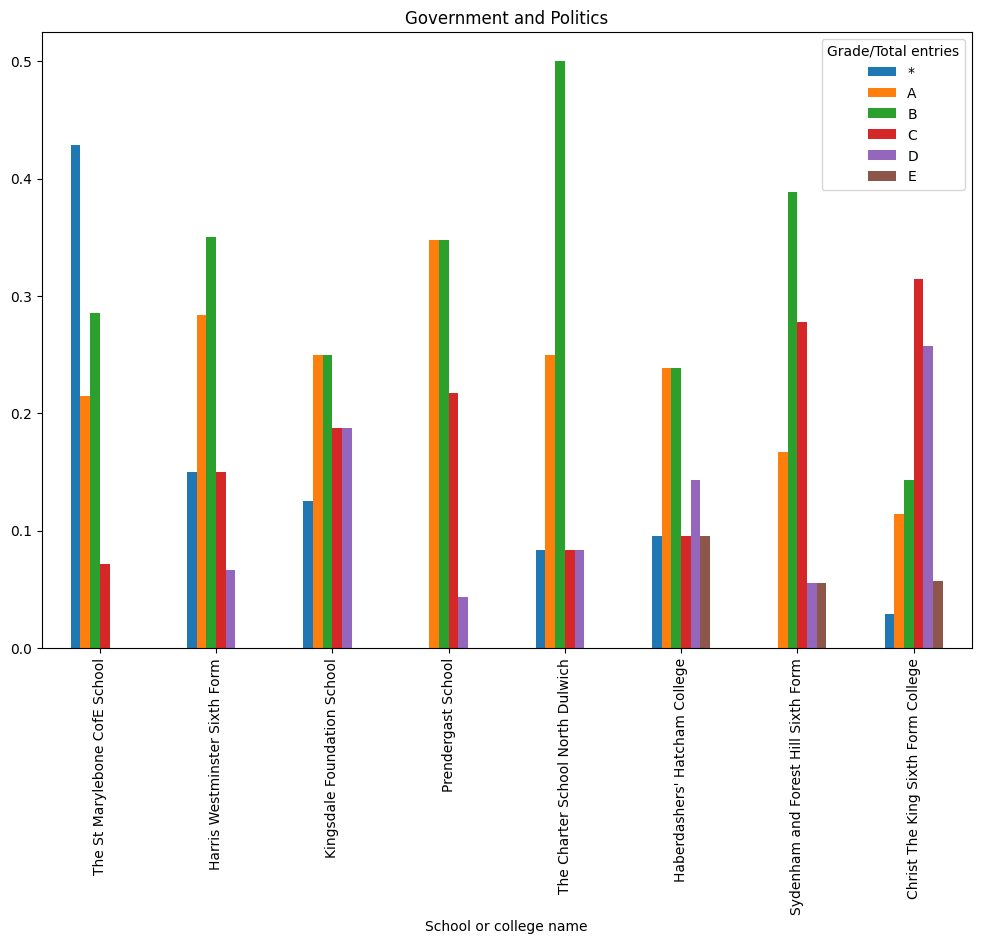

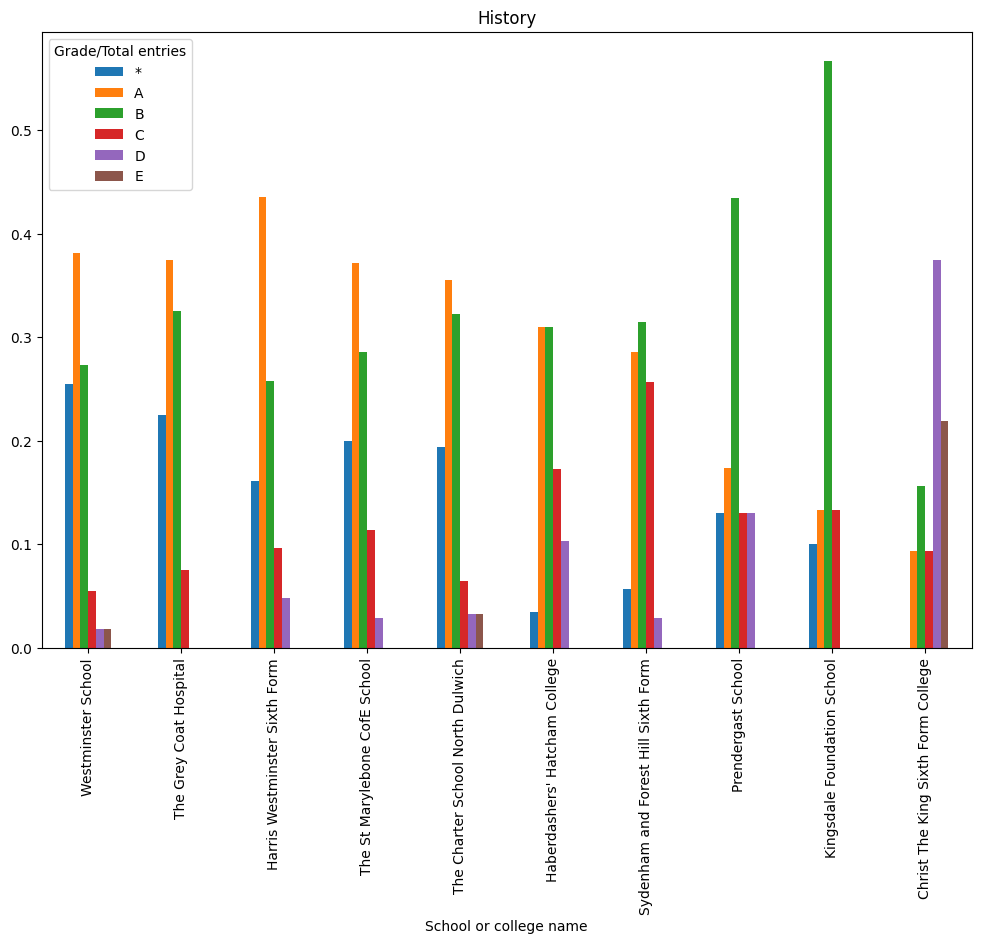

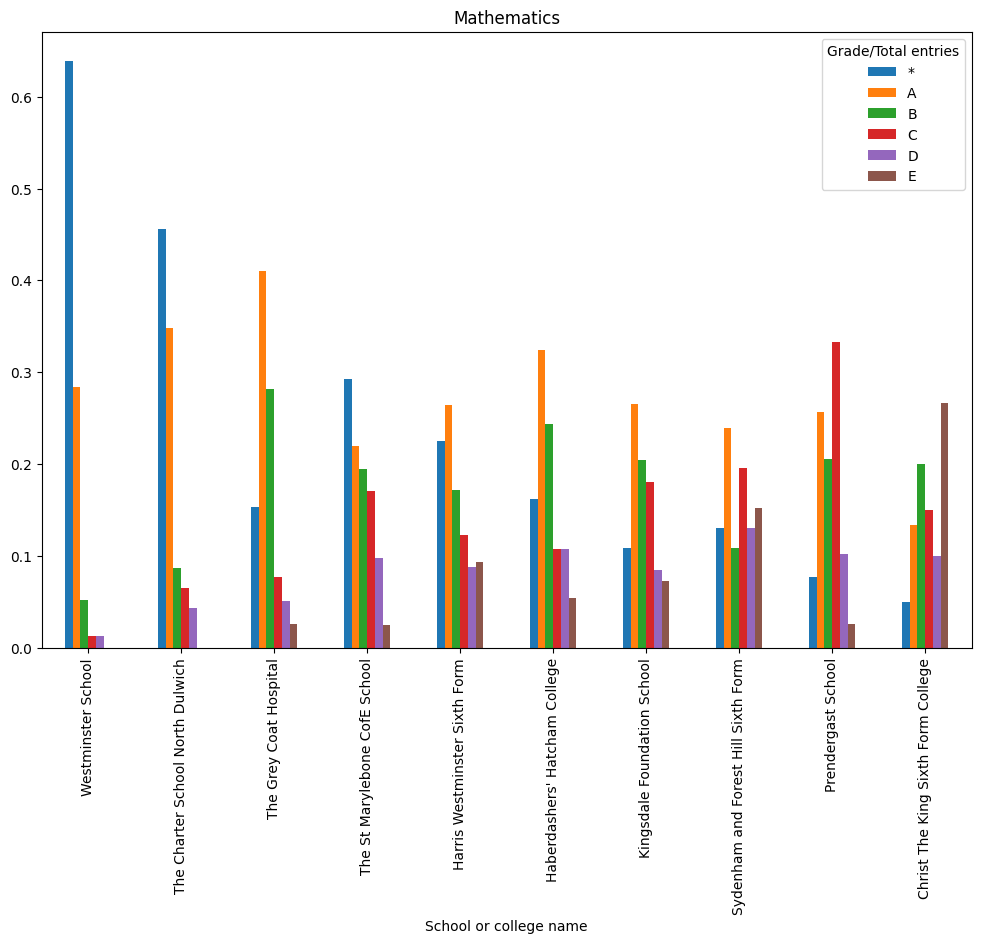

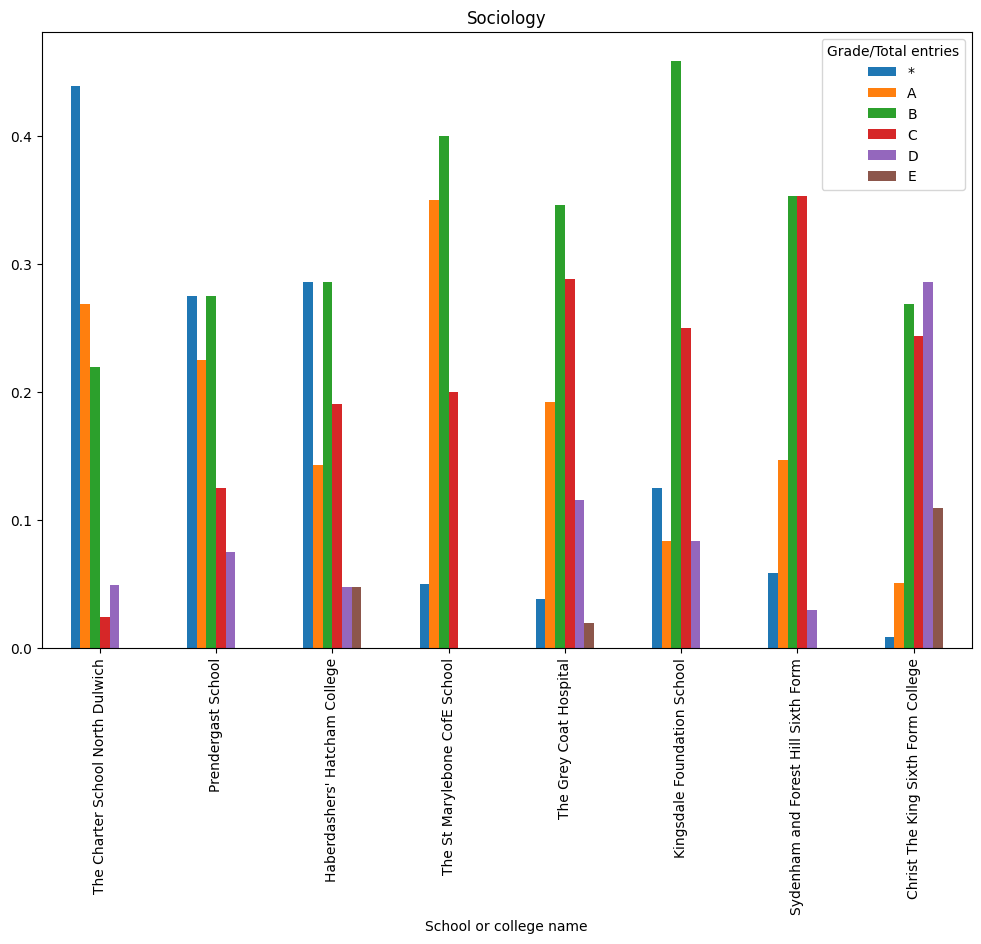

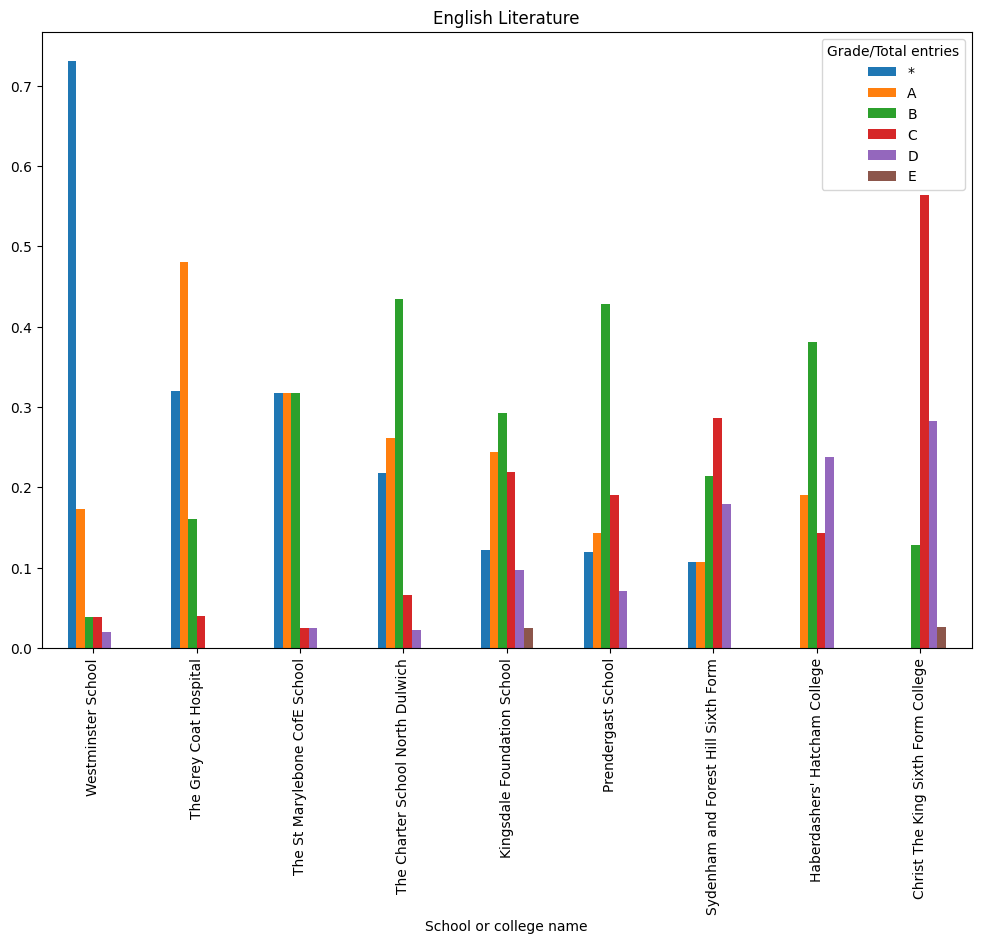

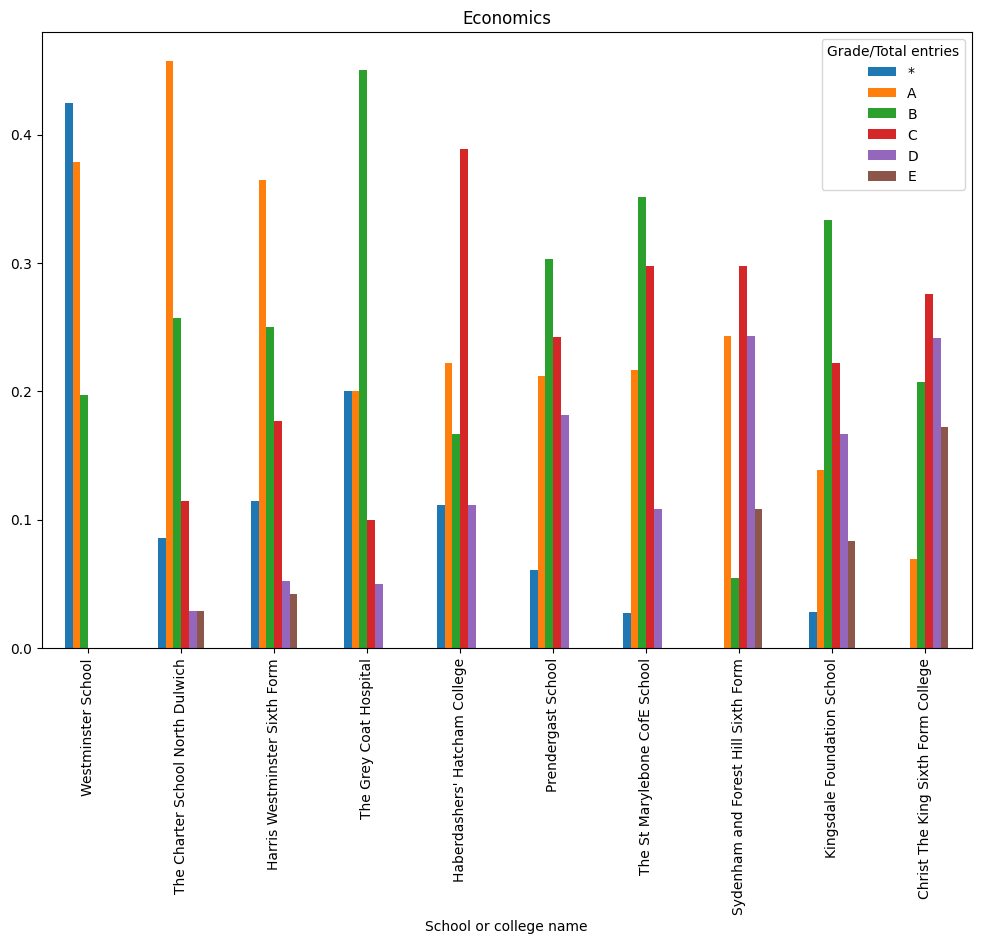

In [84]:
s = subj_23.loc[subj_23['URN'].isin(schools_urn) ].copy()
a_levels = s.loc[s['Qualification']=='GCE A level']

for subj in courses:
    course = a_levels.loc[(s['Subject']==subj)].pivot(
        index='School or college name', 
        columns='Grade/Total entries', 
        values='Number of exams'
        ).reset_index()
    c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Total']].fillna(0).astype(float)
    c = c.div(c['Total'], axis=0)
    c['School or college name']=course['School or college name']
    c['A*A'] = sum([c['*'], c['A']])
    c.sort_values(by='A*A', axis=0, ascending=False)[['School or college name','*', 'A', 'B', 'C', 'D', 'E',]].plot(
        kind='bar', x='School or college name', figsize=(12,8), title=subj)

/tmp/ipykernel_3058/1513244554.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  c = course[['*', 'A', 'B', 'C', 'D', 'E', 'Fail', 'No result', 'Total']].fillna(0).astype(float)
